<a href="https://colab.research.google.com/github/Dinal-Senadheera/simpleNLP/blob/main/NLP_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages


In [ ]:
import pandas as pd
import nltk



Read Dataset


In [ ]:
df = pd.read_csv("spam.csv", encoding = "latin-1");
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [ ]:
df.head()
df.rename(columns = {'v1':'class', 'v2':'msg'}, inplace = True)
df.sample(5)

,class,msg
3510,ham,I'm serious. You are in the money base
5387,ham,I will be gentle baby! Soon you will be taking...
2025,ham,"Yes obviously, but you are the eggs-pert and t..."
2178,ham,"I don,t think so. You don't need to be going o..."
977,ham,Dont hesitate. You know this is the second tim...


In [ ]:
df.groupby('class').describe()

msg                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [ ]:
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.groupby('class').describe()

msg                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

Data visualization

In [ ]:
df["length"] = df["msg"].apply(len);

<ipython-input-30-bd7475ac1e78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["length"] = df["msg"].apply(len);


In [ ]:
df.head(2)

,class,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f15ee957b20>,
      dtype=object)

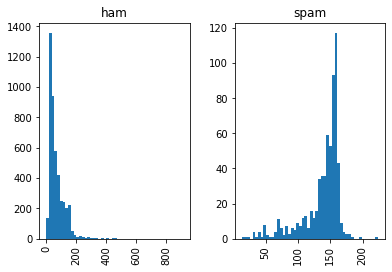

In [ ]:
df.hist(column = "length", by = "class", bins = 50)

Preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head(2)

,class,msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


# Preprocessing tasks

*   Lower Case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming







In [ ]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
df['msg_cleaned'] = df['msg'].apply(clean_text)
df.head()

<ipython-input-57-eed440cc5cf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_cleaned'] = df['msg'].apply(clean_text)


,class,msg,length,msg_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_vec = TfidfVectorizer(max_features = 3000)
X = tf_vec.fit_transform(df['msg_cleaned']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
Y = df['class'].values

Learning

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.9709864603481625
